In [10]:
import wandb
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm
from scipy import stats

In [3]:
wandb.login()

wandb: Currently logged in as: emiel-witting (fsoconut) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [16]:
api = wandb.Api()


runs = []
runs += api.runs("fsoconut/generative-modelling", {"group": "MNIST-base"})
runs += api.runs("fsoconut/generative-modelling", {"group": "MNIST-base-fid"})
runs += api.runs("fsoconut/generative-modelling", {"group": "MNIST-base-fid-acc"})

# Get training accuracy history for each run
best_metric = []
for run in tqdm(runs):
    if run.config['sgld_optimizer'] == 'torch.optim.SGD(x, lr=1)' and run.config['sgld_scheduler'] == 'torch.optim.lr_scheduler.ConstantLR(x, factor=1)':
        history = run.history()
        metric = history['Training/acc'].values
        metric = metric[~np.isnan(metric)]
        width = 10
        metric_smooth = np.convolve(metric, np.ones(width)/width, mode='valid')
        best_metric.append(np.nanmax(metric_smooth))

100%|██████████| 72/72 [00:05<00:00, 12.61it/s] 


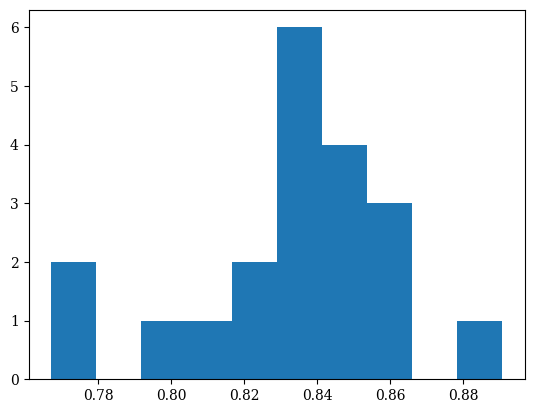

Mean: 0.833
Std Dev: 0.028

Skewness: -0.6379

Skewness interpretation:
The distribution is negatively skewed (skewed left)
Shapiro-Wilk test results:
Statistic: 0.9311
p-value: 0.1622


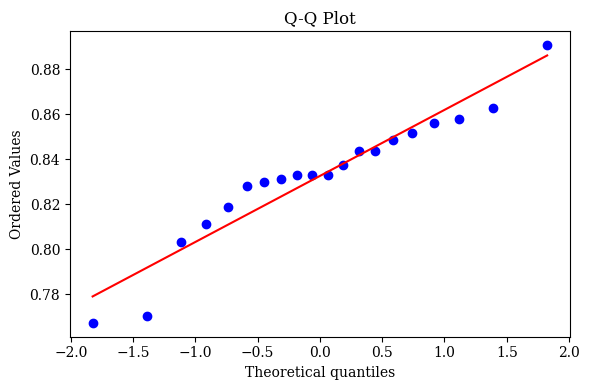


Interpretation:
Failed to reject normality (p >= 0.05)


In [17]:
plt.rcParams['font.family'] = 'serif'

plt.hist(best_metric)
plt.show()

# Calculate and plot mean
mean = np.mean(best_metric)
std = np.std(best_metric)
print(f"Mean: {mean:.3f}\nStd Dev: {std:.3f}")


# Calculate skewness
skewness = stats.skew(best_metric)
print(f"\nSkewness: {skewness:.4f}")

# Print interpretation of skewness
print("\nSkewness interpretation:")
if abs(skewness) < 0.5:
    print("The distribution is approximately symmetric")
elif skewness < 0:
    print("The distribution is negatively skewed (skewed left)")
else:
    print("The distribution is positively skewed (skewed right)")


# Test for normality using Shapiro-Wilk test
stat, p_value = stats.shapiro(best_metric)

print("Shapiro-Wilk test results:")
print(f"Statistic: {stat:.4f}")
print(f"p-value: {p_value:.4f}")

# Create Q-Q plot to visually assess normality
fig, ax = plt.subplots(figsize=(6, 4))
stats.probplot(best_metric, dist="norm", plot=ax)
ax.set_title("Q-Q Plot")
plt.tight_layout()
plt.show()

# Print interpretation
print("\nInterpretation:")
if p_value < 0.05:
    print("The distribution is significantly different from normal (p < 0.05)")
else:
    print("Failed to reject normality (p >= 0.05)")
